## Assignment 3 - Bank Marketing Data Set

Elizabeth Bella Ruth Septiana

PYTN-KS08-016 (batch 3)

Python for Data Science

## Project Overview

Assignment ke-3 ini menggunakan dataset dari Machine Learning Repository, yaitu Bank Marketing Data Set dengan dataset yang diambil yaitu bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan input lebih sedikit).
Data tersebut terkait dengan promosi marketing langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan berlangganan **'yes'** atau tidak **'no'**.

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (yes/no) deposito berjangka (variabel y). Dataset ini berisi:

**Input Variables:
Data nasabah Bank**

- Age (numeric): Usia
- Job atau Jenis pekerjaan (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital atau Status perkawinan (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- Education atau Pendidikan (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: Apakah kredit default? (categorical: 'no', 'yes', 'unknown')
- Housing: Apakah memiliki pinjaman rumah? (categorical: 'no', 'yes', 'unknown')
- Loan: Apakah memiliki pinjaman pribadi? (categorical: 'no', 'yes', 'unknown')

**Terkait dengan kontak terakhir kampanye saat ini:**

- Contact = Jenis komunikasi kontak (categorical: 'cellular','telephone')
- Month = Kontak terakhir berdasarkan bulan dalam tahun (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week = Kontak terakhir berdasarkan hari dalam pekan (categorical: 'mon', 'tue', 'wed', 'thu','fri')
- Duration = Durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika duration=0 maka y='no'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

**Atribut lain:**

- Campaign: Jumlah kontak yang dilakukan selama campaign dan untuk klien (numeric, includes last contact)
- Pdays: Jumlah hari yang berlalu setelah klien terakhir dihubungi dari campaign sebelumnya (numeric; 999 means client was not previously contacted)
- Previous: Jumlah kontak yang dilakukan sebelum campaign ini dan untuk klien ini (numeric)
- Poutcome: Hasil campaign dari pemasaran sebelumnya (categorical: 'failure', 'nonexistent', 'success')

**Atribut dengan konteks sosial dan ekonomi:**

- Emp.var.rate: Tingkat variasi pekerjaan - indikator triwulanan/quarterly (numeric)
- Cons.price.idx: Indeks harga konsumen - indikator bulanan (numeric)
- Cons.conf.idx: Indeks kepercayaan konsumen - indikator bulanan (numeric)
- Euribor3m: Tarif euribor 3 bulan - indikator harian (numeric)
- Nr.employed: Jumlah karyawan - indikator triwulanan/quarterly (numeric)

**Output Variable (target yang diinginkan):**

- Y: Apakah klien telah berlangganan deposito berjangka? (binary: 'yes', 'no')


In [54]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Model Select
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import library confusion matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score

# Import library SMOTE
#from imblearn.over_sampling import SMOTE

# Import Library Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

# Import libarary Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import libarary Support Vector Machine
from sklearn import svm

# Import libarary Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import libarary Naive Bayes
from sklearn.naive_bayes import GaussianNB

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Memamnggil file bank additional-full. csv dan menyimpan pada sebuah fungsi df atau dataframe
df = pd.read_csv('bank-additional-full.csv', sep=';')
data = pd.DataFrame(df)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
# Mengetahui jumlah baris dan jumlah kolom dari data 
data.shape

(41188, 21)

In [9]:
# Mengetahui informasi mengenai struktur dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
# Mengetahui kolom yang terdapat pada data 
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [27]:
# Mengetahui nilai unique pada data kolom 
for i in data.columns:
    print("\n", i)
    print(data[i].unique())


 age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital
['married' 'single' 'divorced' 'unknown']

 education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 default
['no' 'unknown' 'yes']

 housing
['no' 'yes' 'unknown']

 loan
['no' 'yes' 'unknown']

 contact
['telephone' 'cellular']

 month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

 duration
[ 261  149  226 ... 1246 1556 1868]

 campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

In [26]:
#Mengecek data yang missing value 
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [25]:
#Mengecek data duplikat 
data.duplicated().sum()

0

In [24]:
#Menghapus data duplikat
data.drop_duplicates(inplace=True)

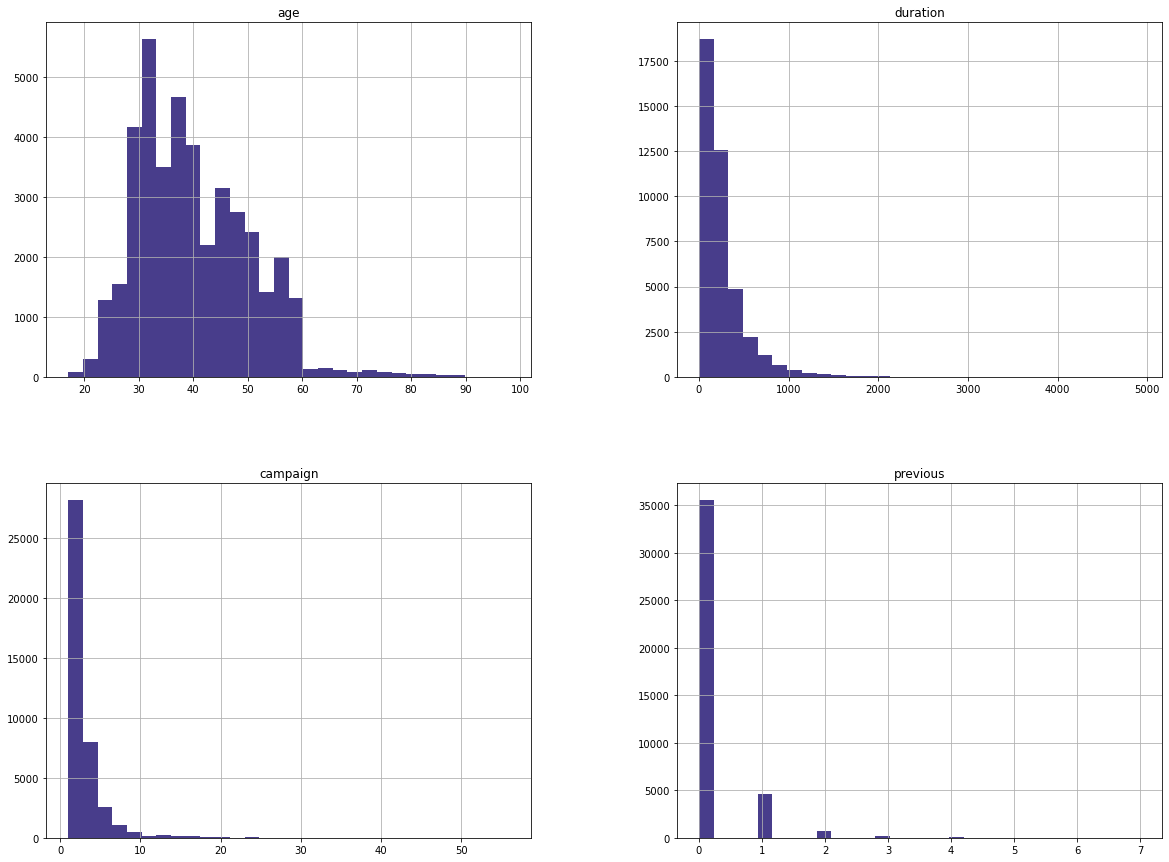

In [33]:
#Menampilkan grafik histogram pada kolom age, duration, campaign, dan previous.
data[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15), color='darkslateblue')
plt.show()

In [35]:
#Membuat variabel kategori untuk menampung data dengan tipe data object dan boolean
category = data.select_dtypes(include=['object', 'bool']).columns.values

for col in category:
    print(col, "(", len(data[col].unique()) , "values):\n", np.sort(data[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


## Data Visualization 

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anacond

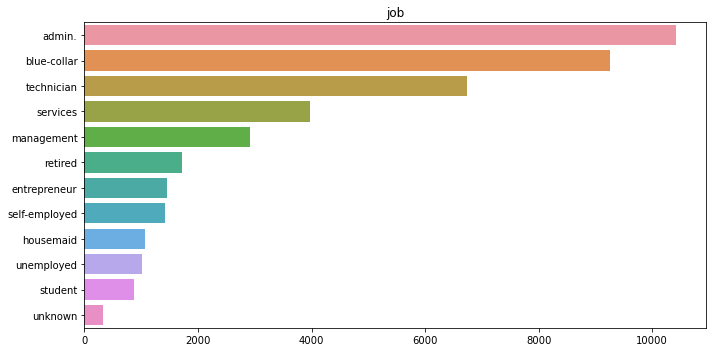

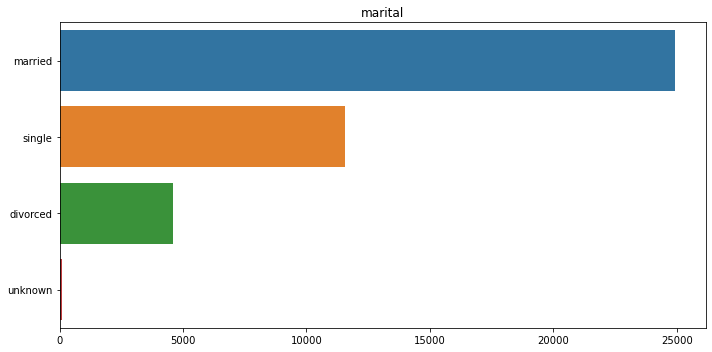

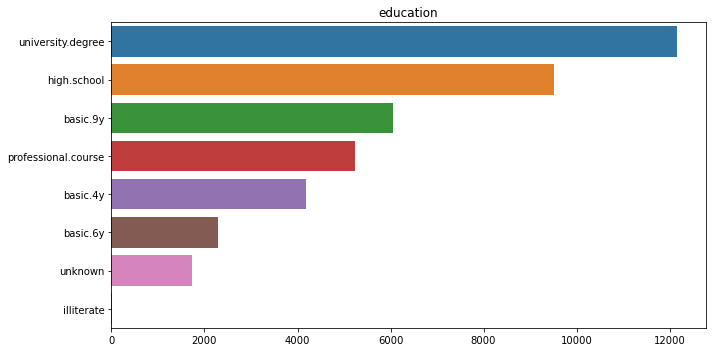

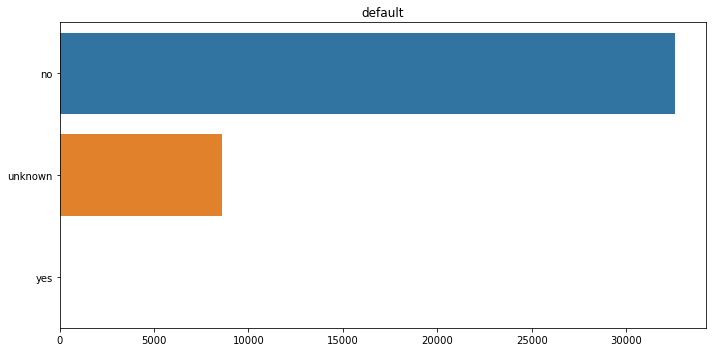

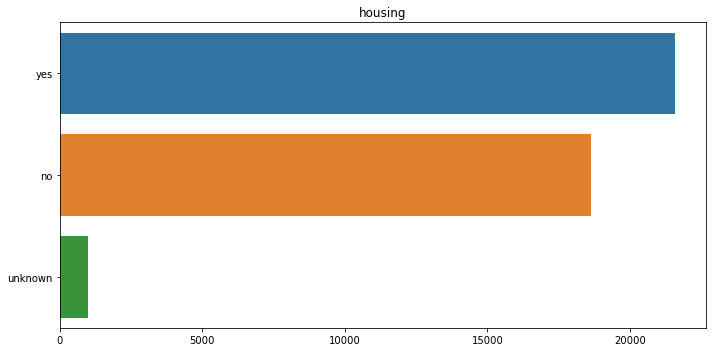

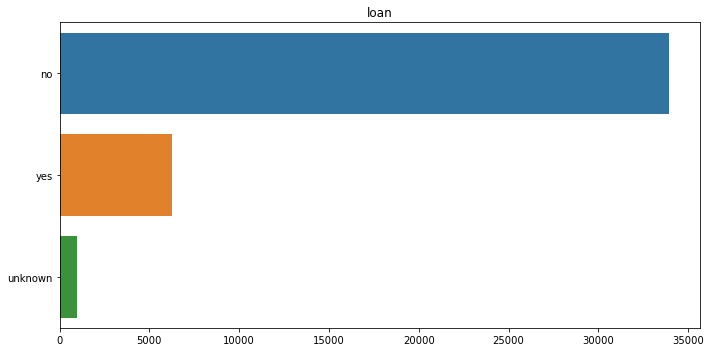

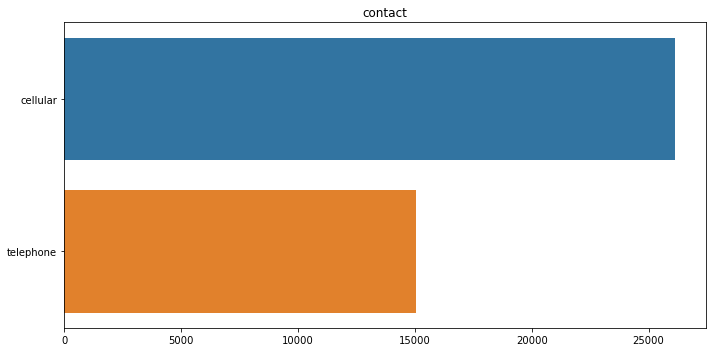

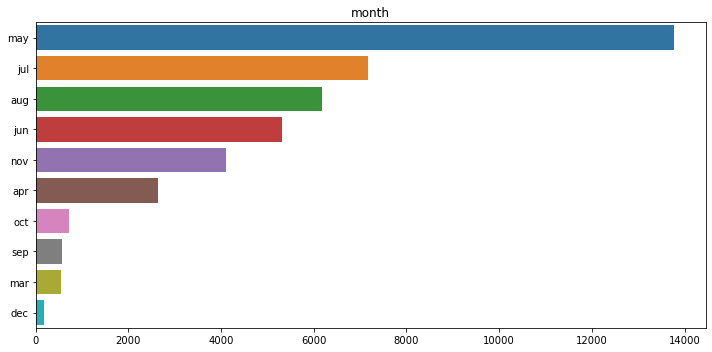

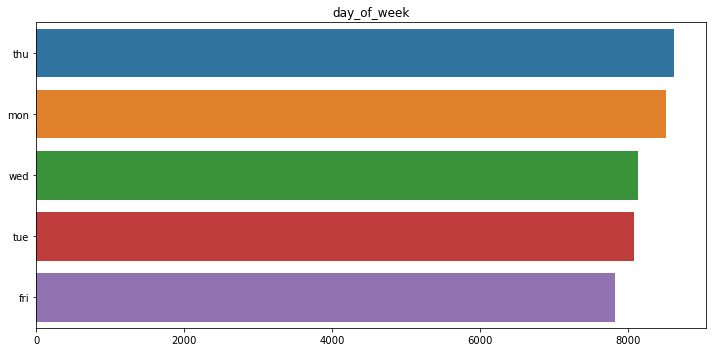

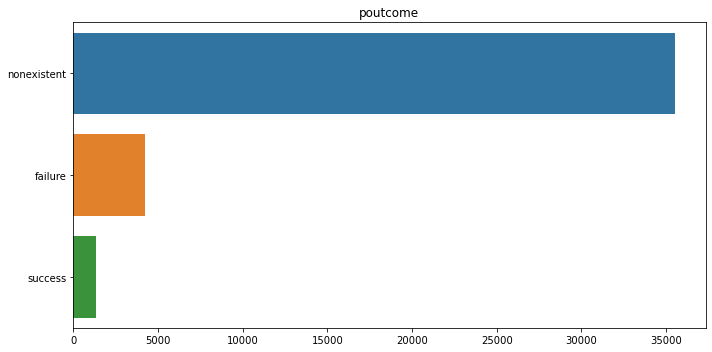

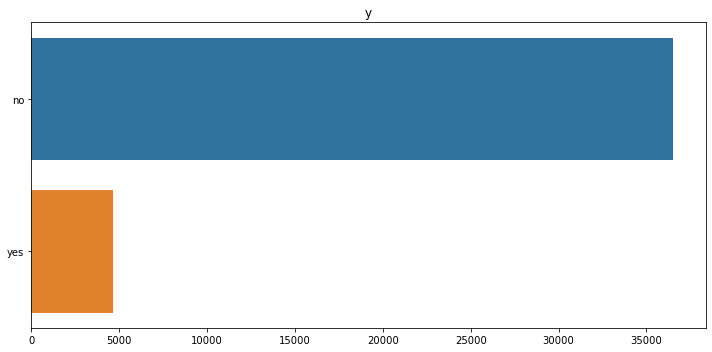

In [36]:
#Membuat barplot untuk variabel kategoris
for col in category:
    plt.figure(figsize=(10,5))    
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index, data=df)    
    plt.title(col)    
    plt.tight_layout()

**Kesimpulan:** 
1. Berdasarkan kategori Job atau jenis pekerjaan, tingkatan audiens yang ingin dicapai pada promosi ini sebagian besar ditargetkan pada admin, blue-collar, dan technician. 
2. Berdasarkan kategori marital atau status pernikahan, dapat disimpulkan bahwa sebagian besar audiens sudah menikah. 
3. Berdasarkan kategori education atau pendidikan, dapat disimpulkan bahwa dapat disimpulkan bahwa sebagian besar audiens berada pada tingkatan sarjana atau telah mengenyam pendidikan di universitas. 
4. Berdasarkan kategori default atau kredit, dapat disimpulkan bahwa sebagian besar audiens tidak memiliki default tetap pada kredit masing-masing audiens. 
5. Berdasarkan kategori housing atau perumahaan, dapat disimpulkan bahwa sebagian besar audiens memiliki pinjaman perumahan. 
6. Berdasarkan kategori loan, dapat disimpulkan bahwa sebagian besar audiens tidak memiliki pinjaman pribadi. 
7. Berdasarkan kategori contact, dapat disimpulkan bahwa media komunikasi yang paling banyak digunakan oleh audiens adalah cellular. 
8. Berdasarkan kategori month atau bulan, dapat disimpulkan bahwa pada bulan Mei merupakan bulan tersibuk, sedangkan pada bulan Desember merupakan bulan tersepi atau tidak sibuk. 
9. Berdasarkan kategori day of week, dapat disimpulkan bahwa tidak banyak perbedaan yang signifikan. Namun hari Kamis merupakan hari  tersibuk dan disusul dengan hari Senin. Sedangkan hari Jumat merupakan hari yang tidak sibuk. 
10. Berdasarkan kategori Poutcome , dapat disimpulkan bahwa hasil dari pemasaran campaign sebelumnya paling banyak tidak ada dan paling sedikit yang berhasil.
11. Berdasarkan kateori Y, dapat disimpulkan bahwa sebagian besar audiens tidak memiliki atau belum berlangganan deposito dalam jangka panjang. 

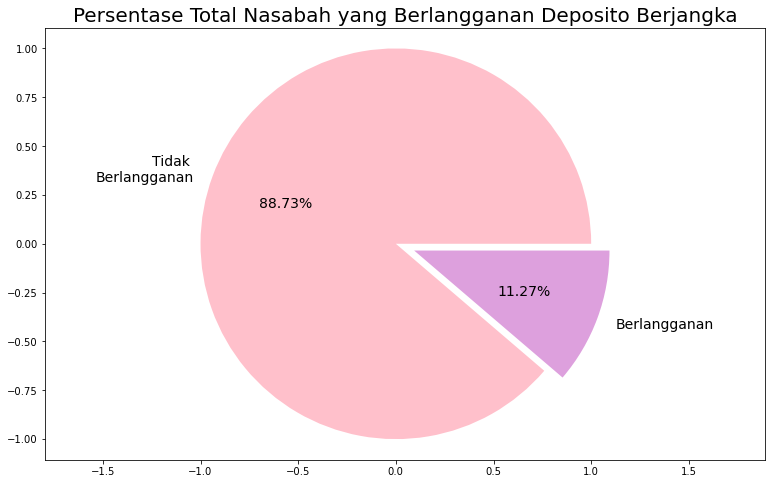

In [37]:
# Membuat pie chart untuk nasabah yang berlangganan deposito berjangka
mylabels = ["Tidak \nBerlangganan", "Berlangganan"]
mycolors = ["pink", "plum"]
explode = (0, 0.1)
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(data['y'].value_counts(), 
       labels = mylabels,
       colors = mycolors,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=14)) 

ax.axis('equal') 
plt.title('Persentase Total Nasabah yang Berlangganan Deposito Berjangka',
     color = 'black',
     fontsize = 20
     )

plt.show()

**Kesimpulan:**
Berdasarkan plot pie chart di atas maka dapat disimpulkan bahwa hanya 11.27% pelanggan yang sudah berlangganan deposito dan 88.73% tidak berlangganan deposito. 

In [38]:
#Membuat definisi cross_tab untuk EDA
def cross_tab(data,f1,f2):
    jobs=list(data[f1].unique())
    edu=list(data[f2].unique())
    dataframes=[]
    for i in edu:
        data_i=data[data[f2]==i]
        data_i_job=data_i.groupby(f1).count()[f2]
        dataframes.append(data_i_job)
    new_cross=pd.concat(dataframes,axis=1)
    new_cross.columns=edu
    new_cross=new_cross.fillna(0)
    return new_cross

In [39]:
#Melihat cross_tab untuk variabel job dan education
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5750,1.0
blue-collar,2318,878,1425,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,97,284,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2680,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [41]:
#Mengisi data 'unknown' pada kolom job dengan data yang relevan
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [42]:
#Melihat cross_tab untuk variabel job dan education
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5750,1.0
blue-collar,2366.0,878,1447.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,111.0,285,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2830,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [43]:
#Melihat cross_tab untuk variabel job dan housing
cross_tab(data,'job','housing')

,no,yes,unknown
job,,,
admin.,4634,5558,227
blue-collar,4361,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,787,908,44
self-employed,641,740,40
services,1817,2049,101
student,381,471,23


**Kesimpulan:** 
Berdasarkan tabel diatas, maka dapat dilihat bahwa perlu dilakukan data cleansing pada kolom unknown karena terlalu banyak data **unkonwn** yangg tidak dapat dipakai. 

In [44]:
#Menghilangkan data yang bernilai unknown
data = data[data.housing != 'unknown']
data = data[data.loan != 'unknown']
data = data[data.default != 'unknown']
data = data[data.job != 'unknown']
data = data[data.marital != 'unknown']
data = data[data.education != 'unknown']

In [45]:
cross_tab(data,'job','housing')

,no,yes
job,,
admin.,3957,4777
blue-collar,2692,3042
entrepreneur,487,602
housemaid,336,385
management,1130,1273
retired,555,667
self-employed,500,592
services,1410,1555
student,282,328


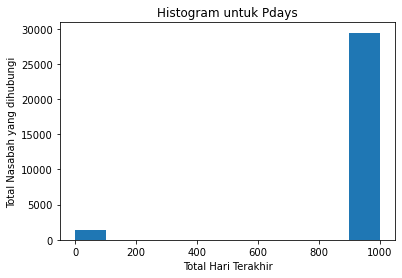

In [46]:
#Memplot histogram untuk pdays
plt.hist(data['pdays'])
plt.title('Histogram untuk Pdays')
plt.xlabel('Total Hari Terakhir')
plt.ylabel('Total Nasabah yang dihubungi')
plt.show()

**Kesimpulan:** 
- Berdasarkan data histogram di atas terlihat bahwa hari terakhir menghubungi nasabah di sekitar hari ke - 999 yang mana terdapat kerancuan yang mengindikasikan bahwa nasabah sebelumnya tidak dihubungi. Sehingga nilai ini perlu diubah menjadi variable kategori. 

In [60]:
#
data['pdays_missing'] = 0
data['pdays_less_5'] = 0
data['pdays_greater_15'] = 0
data['pdays_bet_5_15'] = 0
data['pdays_missing'][df['pdays']==999] = 1
data['pdays_less_5'][df['pdays']<5] = 1
data['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
data['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1

## Encode Data

In [61]:
#Encode data variabel kategori dengan encoder label
kategoris = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for cols in kategoris:
    data[cols] = label_encoder.fit_transform(data[cols])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0


## Defining Model 

In [62]:
train,test = train_test_split(data,test_size = 0.30 ,random_state = 350)
    
#Memisahkan variabel dependen dan independen pada data training dan testing
x_train = train.drop(labels='y',axis=1)
y_train = train['y']
x_test  = test.drop(labels='y',axis=1)
y_test  = test['y']


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

## Data Modeling 

## Logistic Regression 

In [63]:
#Membuat model logistic regression
log_reg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=50)
log_reg.fit(X_train, y_train)

#Menguji dataset
x_test = scaler.transform(x_test)

#Memprediksi output
y_pred = log_reg.predict(x_test)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8095
           1       0.66      0.44      0.53      1140

    accuracy                           0.90      9235
   macro avg       0.79      0.70      0.74      9235
weighted avg       0.89      0.90      0.89      9235



In [57]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8095    0]
 [1140    0]]


In [64]:
#Akurasi dari Logistic Regression
print('Akurasi untuk Logistic Regression:', log_reg.score(X_test, y_test))

Akurasi untuk Logistic Regression: 0.8765565782349757


## K-NEAREST NEIGHBORS 

In [66]:
#Membuat model K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=50)

# Train model menggunakan training set
KNN.fit(x_train, y_train)

# Memprediksi respon/output
y_pred1 = KNN.predict(x_test)

In [67]:
#Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[7880  215]
 [ 770  370]]


In [68]:

#Akurasi dari K-Nearest Neighbors
print("Akurasi untuk K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))

Akurasi untuk K-Nearest Neighbors: 0.8933405522468868


## Support Vector Machine

In [69]:
# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(x_train, y_train) 

# Predict the response for test dataset
y_pred2 = svm_model.predict(x_test)

In [70]:
#Confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[7870  225]
 [ 762  378]]


In [71]:
#Akurasi dari Support Vector Machine
print("Akurasi untuk Support Vector Machine:", metrics.accuracy_score(y_test, y_pred2))

Akurasi untuk Support Vector Machine: 0.8931239848402815


## Decision Tree Classifier

In [72]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
dtc = dtc.fit(x_train,y_train)

# Predict the response for test dataset
y_pred3 = dtc.predict(x_test)

In [73]:
#Confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[7710  385]
 [ 507  633]]


In [74]:
#Akurasi dari Decision Tree
print("Akurasi untuk Decision Tree:",metrics.accuracy_score(y_test, y_pred3))

Akurasi untuk Decision Tree: 0.9034109366540336


## Random Forest Classifier

In [75]:
#Membuat model Random Forest
rfc = RandomForestClassifier(n_estimators=100)
 
# Train the model using the training
rfc.fit(x_train,y_train) 

y_pred4 = rfc.predict(x_test)

In [76]:
#Confusion Matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[7791  304]
 [ 562  578]]


In [77]:
#Akurasi untuk Random Forest
print("Akurasi untuk Random Forest:",metrics.accuracy_score(y_test, y_pred4))

Akurasi untuk Random Forest: 0.9062263129399025


## Naive Bayes

In [78]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred5 = gnb.predict(x_test)

In [79]:
#Confusion Matrix
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[5369 2726]
 [ 175  965]]


In [80]:
#Akurasi dari Naive Bayes
print("Akurasi untuk Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Akurasi untuk Naive Bayes: 0.6858689767190038


## Model Evaluation

In [81]:
#Kumpulan akurasi:
print("Berikut ini merupakan akurasi dari berbagai macam model:")
print("Logistic Regression:",metrics.accuracy_score(y_test, y_pred))
print("K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))
print("Support Vector Machine:",metrics.accuracy_score(y_test, y_pred2))
print("Decision Tree:",metrics.accuracy_score(y_test, y_pred3))
print("Random Forest:",metrics.accuracy_score(y_test, y_pred4))
print("Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Berikut ini merupakan akurasi dari berbagai macam model:
Logistic Regression: 0.902652950730915
K-Nearest Neighbors: 0.8933405522468868
Support Vector Machine: 0.8931239848402815
Decision Tree: 0.9034109366540336
Random Forest: 0.9062263129399025
Naive Bayes: 0.6858689767190038


## Kesimpulan

- Berdasarkan hasil analisis dari model evaluasi yang telah dilakukan, dapat disimpulkan bahwa model **Random Forest** memiliki nilai akurasi tertinggi yaitu sebesar **0.90622** untuk memprediksi nasabah bank di masa yang akan datang. 